# Вакуумный триод


## Импорты и массивы

In [2]:
import numpy as np
import numpy as np
from scipy.optimize import curve_fit
from numpy import array, exp
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle as rect
from numpy.polynomial import Polynomial


Ra = 2.5

#Задание 1а
u11c=[-5.2, -5.6, -5.8, -6.3, -6.8, -7.2, -7.7, -8.2, -9, -10, -12.9]
i11=[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0.1] #мА
u11a=220

#Задание 1б
u12c=[-2, -2.4, -2.8, -3.1, -3.5, -3.9, -4.4, -5, -5.6, -6.4, -8.4]
i12=[10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0.1]#мА
u12a=150

#Задание 1в
u13c=[-5.2, -5.6, -5.8, -6.3, -6.8, -7.2, -7.7, -8.2, -9, -10]
u13vyh=[1, 0.98, 0.94, 0.88, 0.84, 0.78, 0.72, 0.62, 0.49, 0.31]
u13a=220
u13vh=0.2
S13 = [u/(u13vh*Ra) for u in u13vyh]

#Задание 1г
u14a=[220, 211, 204, 198, 190, 184, 178, 170, 164, 154, 142]
u14vyh=[0.66, 0.6, 0.54, 0.48, 0.42, 0.36, 0.3, 0.24, 0.18, 0.12, 0.06]
u14c=-8
u14vh=0.2
S14 = [u/(u14vh*Ra) for u in u14vyh]

#Задание 2а
u21a=[220, 216, 212, 208, 204, 200, 194, 188, 180, 172, 160, 130]
i21=[3.3, 3, 2.7, 2.4, 2.1, 1.8, 1.5, 1.2, 0.9, 0.6, 0.3, 0] #мА
u21c=-8

#Задание 2б
u22a=[220, 214, 207, 202, 194, 186, 178, 170, 160, 150, 132, 90]
i22=[7.6, 6.9, 6.2, 5.5, 4.8, 4.1, 3.4, 2.7, 2, 1.3, 0.6, 0] #мА
u22c=-6

#Задание 2в
u23a=[220, 214, 210, 206, 202, 196, 192, 186, 178, 170, 158, 148, 124]
u23vyh=[0.54, 0.5, 0.48, 0.46, 0.44, 0.42, 0.38, 0.36, 0.32, 0.26, 0.2, 0.16, 0.12]
u23c=-8
u23vh=3
R23 = [u23vh*Ra/u for u in u23vyh]

#Задание 2г
u24c=[-5.1, -5.6, -5.9, -6.4, -6.8, -7.2, -7.8, -8.4, -9, -10, -13]
u24vyh=[0.72, 0.7, 0.68, 0.65, 0.62, 0.6, 0.55, 0.5, 0.42, 0.3, 0.12]
u24a=220
u24vh=3
R24 = [u24vh*Ra/u for u in u24vyh]

#коэффициееты усиления
mu1 = [S13[k]*R24[k] for k in range(len(S13))]
mu2 = [S14[k]*R23[k] for k in range(len(S14))]


## Функции

In [32]:
def approximate(x, y, title="", x_label="B", y_label="mA", color="b", label = "", degree = 4):
    x_data = x
    y_data = y

    xh = np.linspace(x_data[0], x_data[-1], 100)
    approximation = Polynomial.fit(x_data, y_data, degree)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label, rotation=0)
    plt.minorticks_on()
    plt.grid( which='minor', alpha=0.3)
    plt.grid(which='major', alpha=1)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(x_label,labelpad=8)
    ax.set_ylabel(y_label,labelpad=8)
    ax.yaxis.label.set_rotation(90)
    ax.plot(xh,approximation(xh),label = label,linewidth = 1, color = color)


def plot_error(x_m, y_m, x_err, y_err, color="red", title="",  x_label="В", y_label="mА", mod=1, label = "", loc1 = 0, loc2 = 0):
    #plot(x_m, y_m)
    fig=plt.figure()
    ax=fig.add_subplot()
    n=len(x_m)
    # plot_and_approx(x_m, y_m, title=title, x_label=x_label, y_label=y_label, mod=mod)
    for i in range(n):
        x=x_m[i]
        y=y_m[i]
        x_e=x_err
        y_e=y_err
        x_n=x-x_e
        y_n=y-y_e
        ax.add_patch(rect((x_n, y_n), x_e*2, y_e*2, edgecolor=color,fc="none"))
    # plt.grid( which='major')
    # plt.minorticks_on()
    # plt.grid( which='minor', alpha=0.3)
    plt.show()

## Графики


### Анодно-сеточная характеристики(1а, 1б)


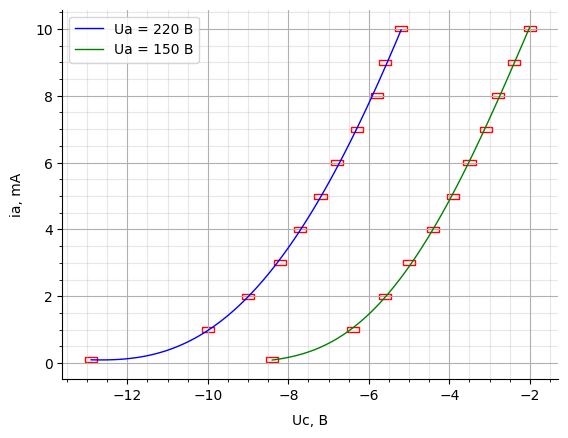

In [33]:
fig=plt.figure()
ax=fig.add_subplot()

u_err=0.5*30/100
i_err=0.5*15/100

for k in range(len(u11c)):
  x1=u11c[k]
  y1=i11[k]
  x1_n=x1-u_err
  y1_n=y1-i_err
  ax.add_patch(rect((x1_n, y1_n), u_err*2, i_err*2, edgecolor="red",fc="none"))

  x2=u12c[k]
  y2=i12[k]
  x2_n=x2-u_err
  y2_n=y2-i_err
  ax.add_patch(rect((x2_n, y2_n), u_err*2, i_err*2, edgecolor="red",fc="none"))

approximate(u11c, i11, label = "Ua = 220 В",x_label="Uc, B", y_label="ia, mA")
approximate(u12c, i12,label = "Ua = 150 В", color = "g",x_label="Uc, B", y_label="ia, mA")
plt.legend(loc="best")

### Крутизна(1в, 1г)

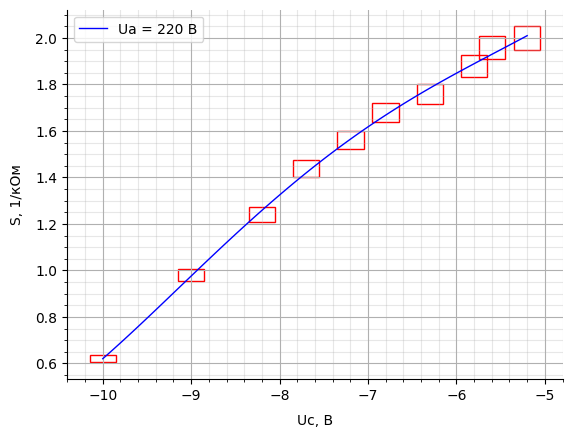

In [34]:
fig=plt.figure()
ax=fig.add_subplot()

uc_err=0.5*30/100
s_err=[s*2.5*1/100 for s in S13]
# print(s_err)

for k in range(len(u13c)):
  x1=u13c[k]
  y1=S13[k]
  x1_n=x1-uc_err
  y1_n=y1-s_err[k]
  ax.add_patch(rect((x1_n, y1_n), uc_err*2, s_err[k]*2, edgecolor="red",fc="none"))

approximate(u13c, S13, x_label="Uc, B", y_label="S, 1/кОм" ,label = "Ua = 220 В")
plt.legend(loc="best")

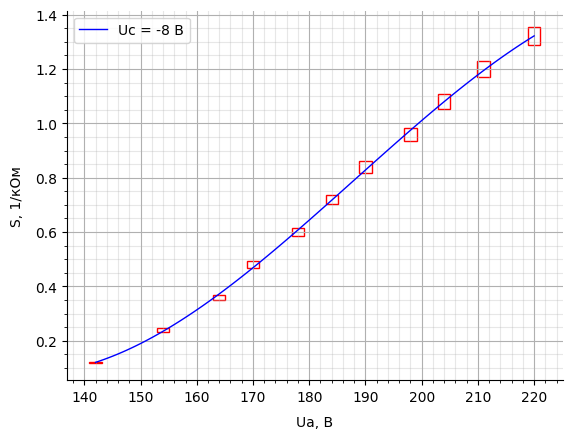

In [35]:
fig=plt.figure()
ax=fig.add_subplot()

ua_err=0.5*220/100
s_err=[s*2.5*1/100 for s in S14]
# print(s_err)

for k in range(len(u14a)):
  x1=u14a[k]
  y1=S14[k]
  x1_n=x1-ua_err
  y1_n=y1-s_err[k]
  ax.add_patch(rect((x1_n, y1_n), ua_err*2, s_err[k]*2, edgecolor="red",fc="none"))

approximate(u14a, S14, x_label="Ua, B", y_label="S, 1/кОм" ,label = "Uc = -8 В")
plt.legend(loc="best")

### Анодные характеристики(2а,2б)

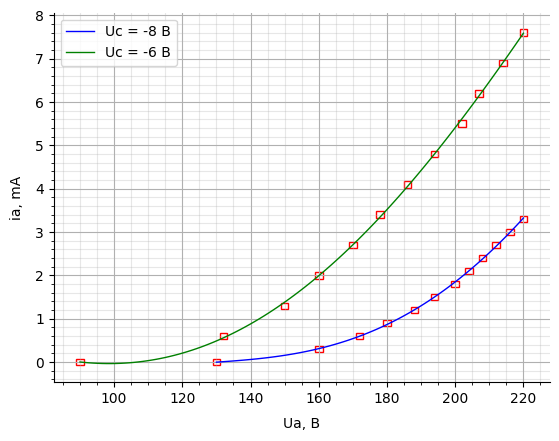

In [36]:
fig=plt.figure()
ax=fig.add_subplot()

u_err=0.5*220/100
i_err=0.5*15/100

for k in range(len(u21a)):
  x1=u21a[k]
  y1=i21[k]
  x1_n=x1-u_err
  y1_n=y1-i_err
  ax.add_patch(rect((x1_n, y1_n), u_err*2, i_err*2, edgecolor="red",fc="none"))

  x2=u22a[k]
  y2=i22[k]
  x2_n=x2-u_err
  y2_n=y2-i_err
  ax.add_patch(rect((x2_n, y2_n), u_err*2, i_err*2, edgecolor="red",fc="none"))

approximate(u21a, i21, x_label="Ua, B", y_label="ia, mA", label = "Uс = -8 В")
approximate(u22a, i22, x_label="Ua, B", y_label="ia, mA", label = "Uc = -6 В", color = "g")
plt.legend(loc="best")

### Внутреннее сопротивление(2в, 2г)

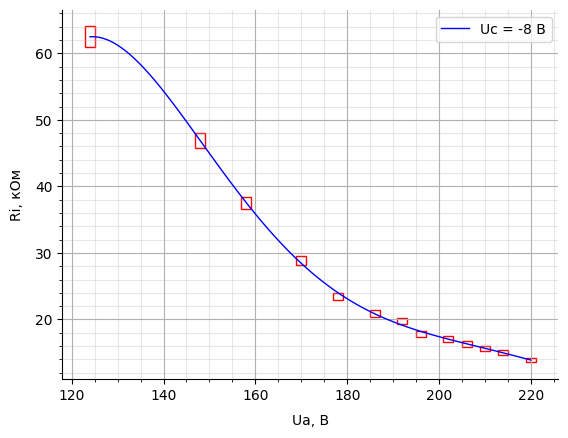

In [37]:
fig=plt.figure()
ax=fig.add_subplot()

ua_err=0.5*220/100
r_err=[r*2.5*1/100 for r in R23]
# print(s_err)

for k in range(len(u23a)):
  x1=u23a[k]
  y1=R23[k]
  x1_n=x1-ua_err
  y1_n=y1-r_err[k]
  ax.add_patch(rect((x1_n, y1_n), ua_err*2, r_err[k]*2, edgecolor="red",fc="none"))

approximate(u23a, R23, x_label="Ua, B", y_label="Ri, кОм" ,label = "Uс = -8 В", degree = 5)
#plt.plot(u23a, R23)
#plt.yscale("log")
plt.legend(loc="best")

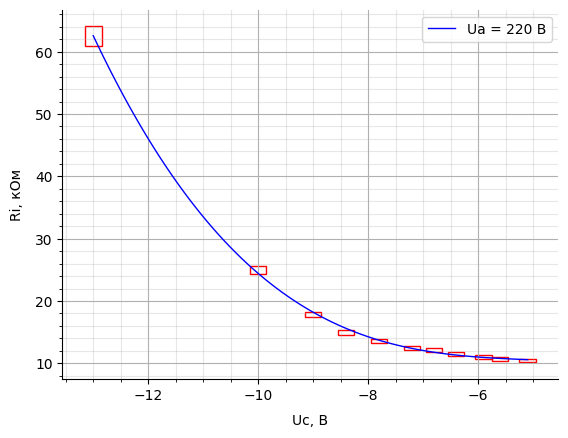

In [38]:
fig=plt.figure()
ax=fig.add_subplot()

uc_err=0.5*30/100
r_err=[r*2.5*1/100 for r in R24]
# print(s_err)

for k in range(len(u24c)):
  x1=u24c[k]
  y1=R24[k]
  x1_n=x1-uc_err
  y1_n=y1-r_err[k]
  ax.add_patch(rect((x1_n, y1_n), uc_err*2, r_err[k]*2, edgecolor="red",fc="none"))

approximate(u24c, R24, x_label="Uc, B", y_label="Ri, кОм" ,label = "Uа = 220 В", degree = 3)
#plt.plot(u24c, R24)
#plt.yscale("log")
plt.legend(loc="best")

### Статический коэффициент усиления

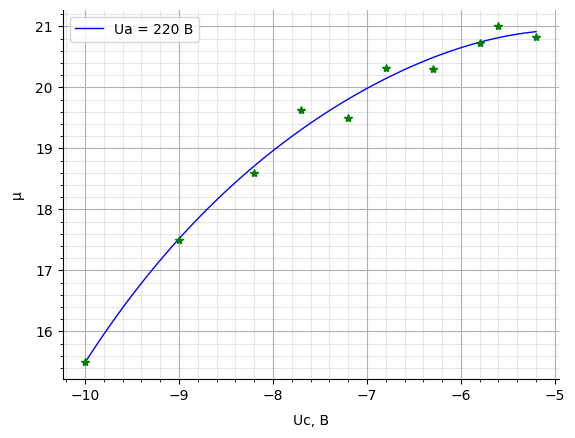

In [44]:
approximate(u13c, mu1, x_label="Uc, B", y_label="μ" ,label = "Uа = 220 В", degree = 4)
plt.plot(u13c, mu1, '*', color = "g")
plt.legend(loc="best")

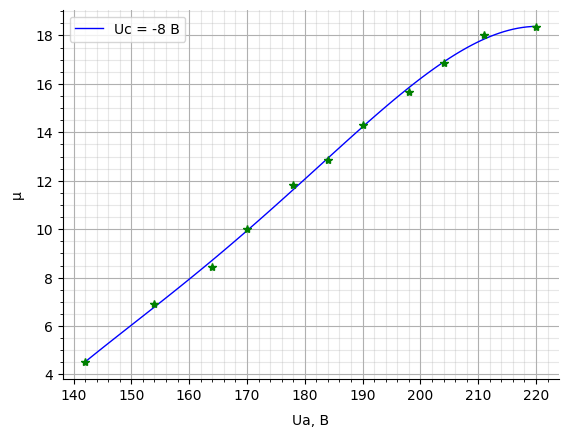

In [43]:
approximate(u14a, mu2, x_label="Ua, B", y_label="μ" ,label = "Uс = -8 В", degree = 4)
plt.plot(u14a, mu2, '*', color = "g")
plt.legend(loc="best")